<h1 style='color:pink'>Crop Recommendation System</h1>

In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
import streamlit as st
import numpy as np

<h3 style='color:red'>Dataset</h3>

In [4]:

#first we load the dataset
crop_reco_data = pd.read_csv('Crop_recommendation.csv')

In [5]:
crop_reco_data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [6]:
crop_reco_data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

<h3 style='color:red'>Visualization</h3>

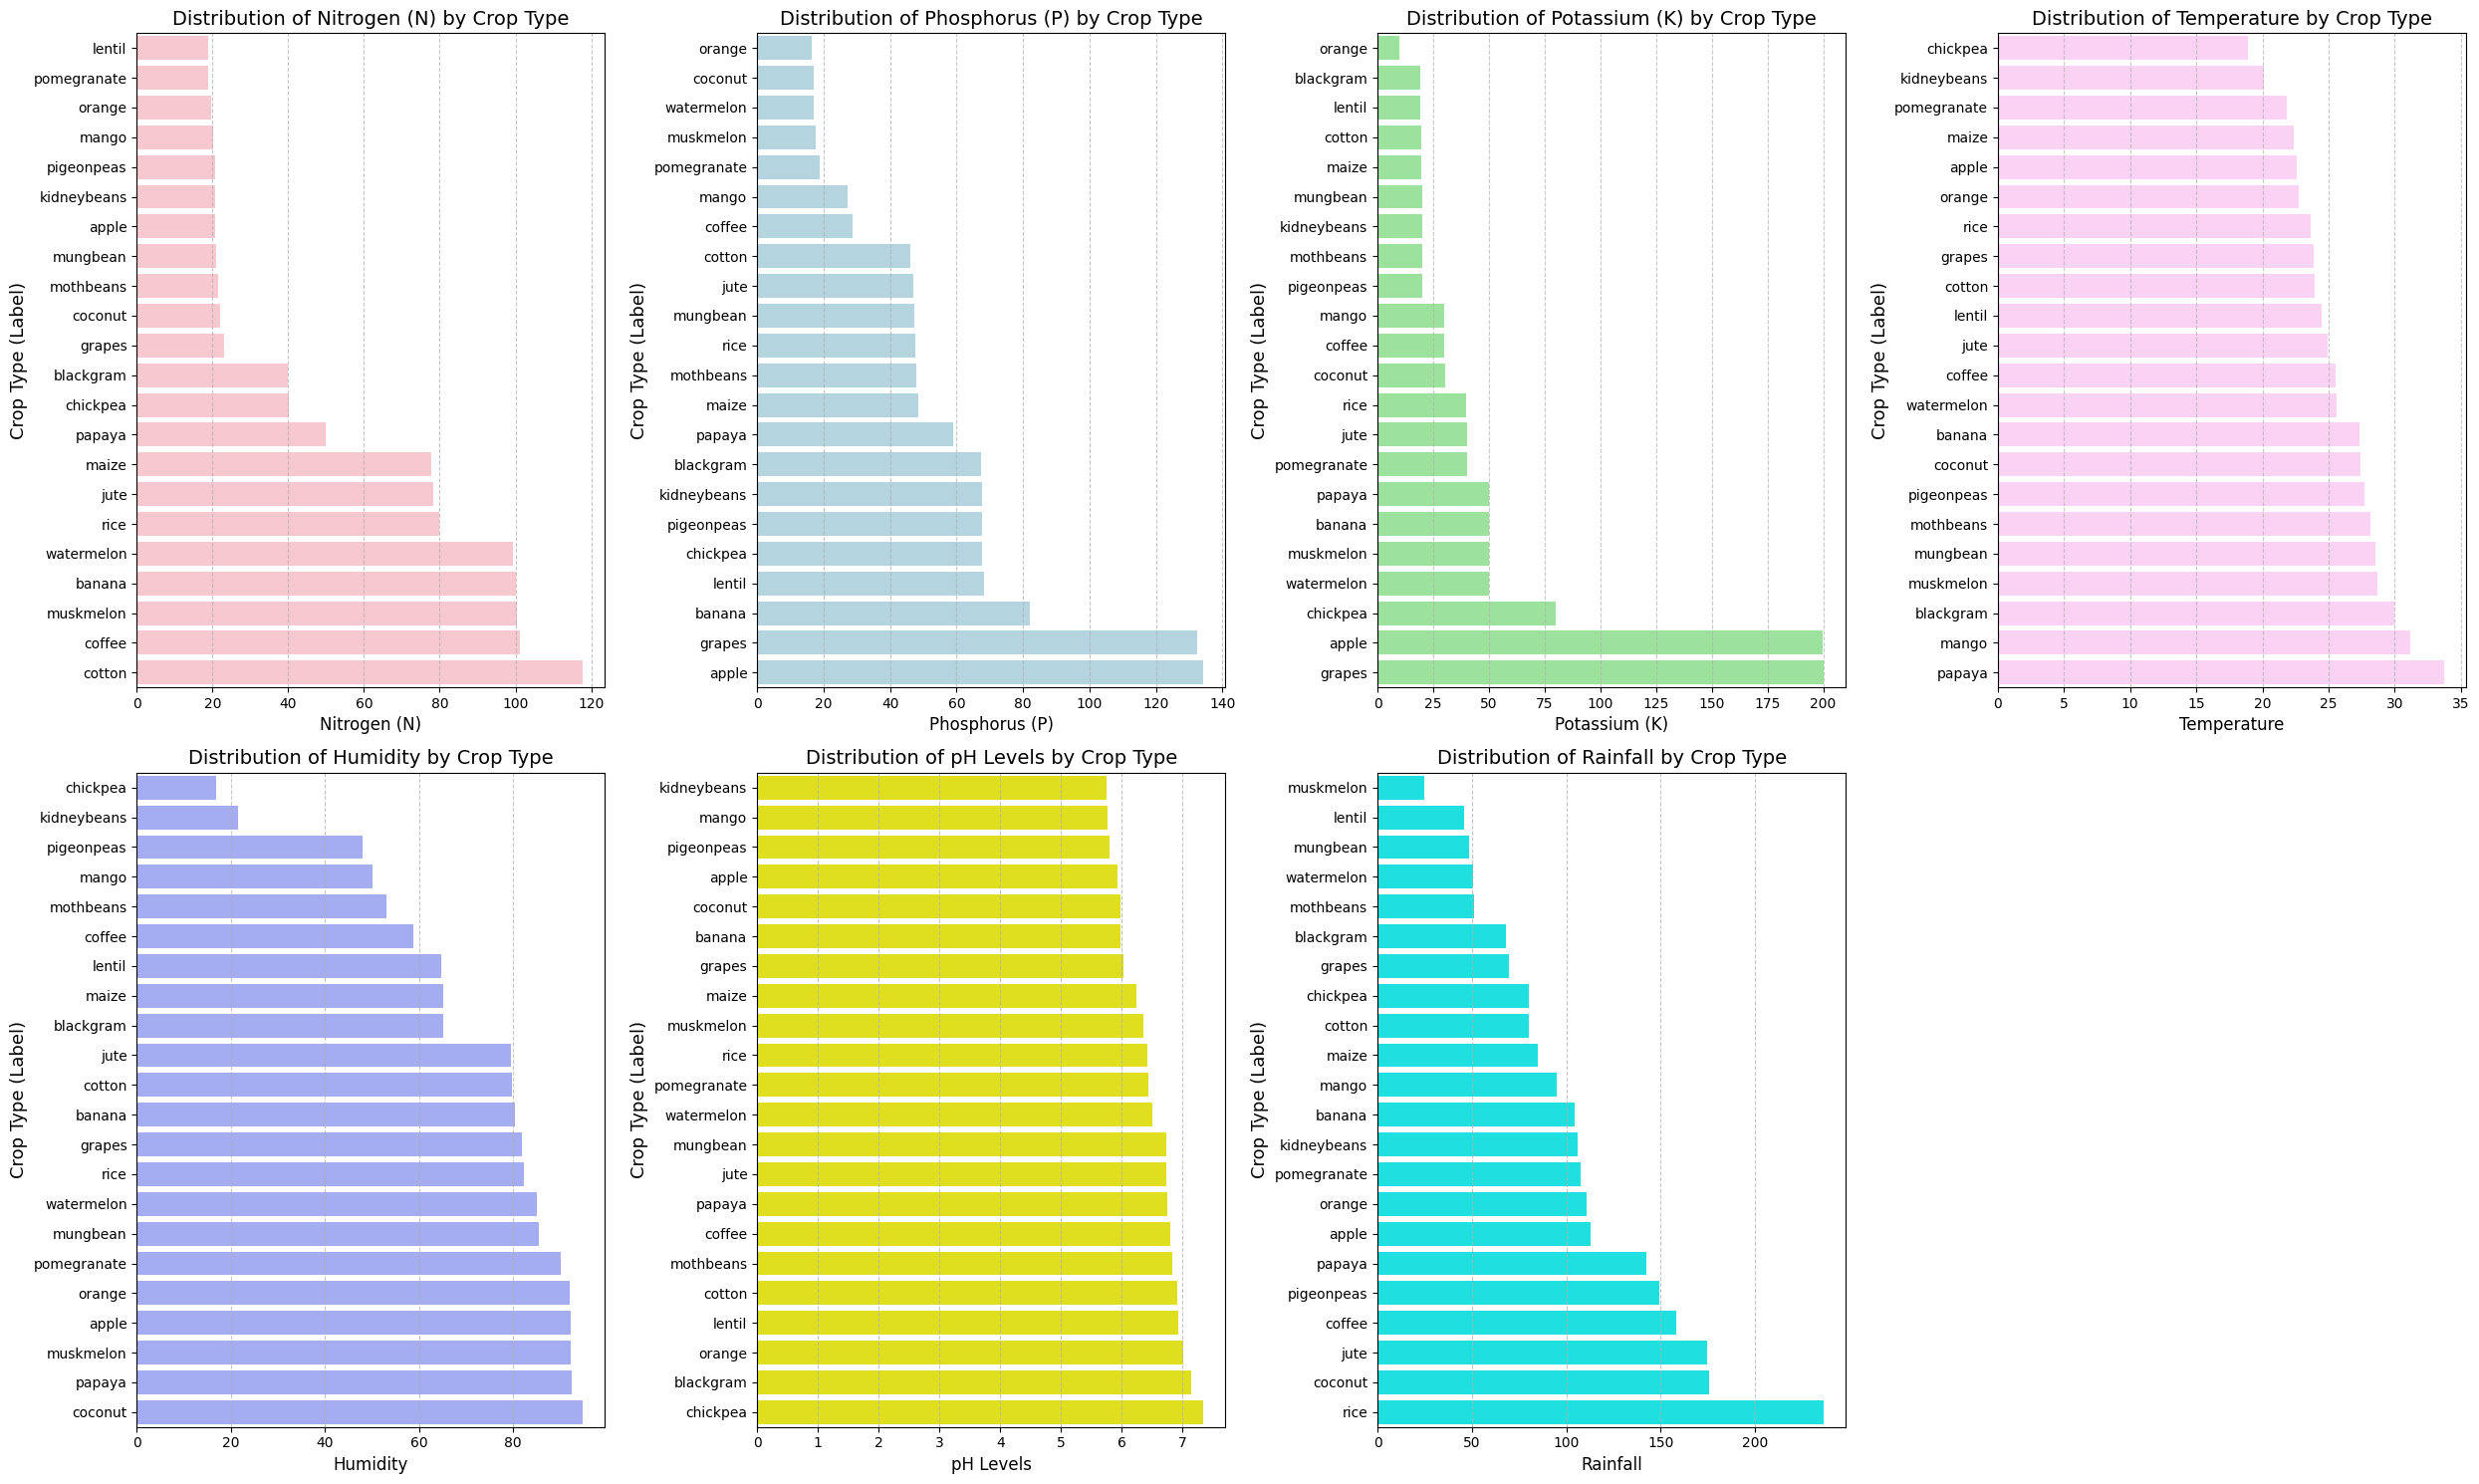

In [7]:
factors = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
titles = ['Nitrogen (N)', 'Phosphorus (P)', 'Potassium (K)', 
          'Temperature', 'Humidity', 'pH Levels', 'Rainfall']
colors = ['pink', 'lightblue', 'lightgreen', '#FFCCF9', '#97A2FF', 'yellow', 'cyan']


plt.figure(figsize=(25, 15))  


for i, factor in enumerate(factors):
    avg_values = crop_reco_data.groupby('label')[factor].mean().sort_values()  
    
    plt.subplot(2, 4, i + 1)  
    sns.barplot(y=avg_values.index, x=avg_values.values, color=colors[i]) 
    plt.title(f'Distribution of {titles[i]} by Crop Type', fontsize=14)
    plt.xlabel(titles[i], fontsize=12)
    plt.ylabel('Crop Type (Label)', fontsize=13)
    plt.grid(axis='x', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

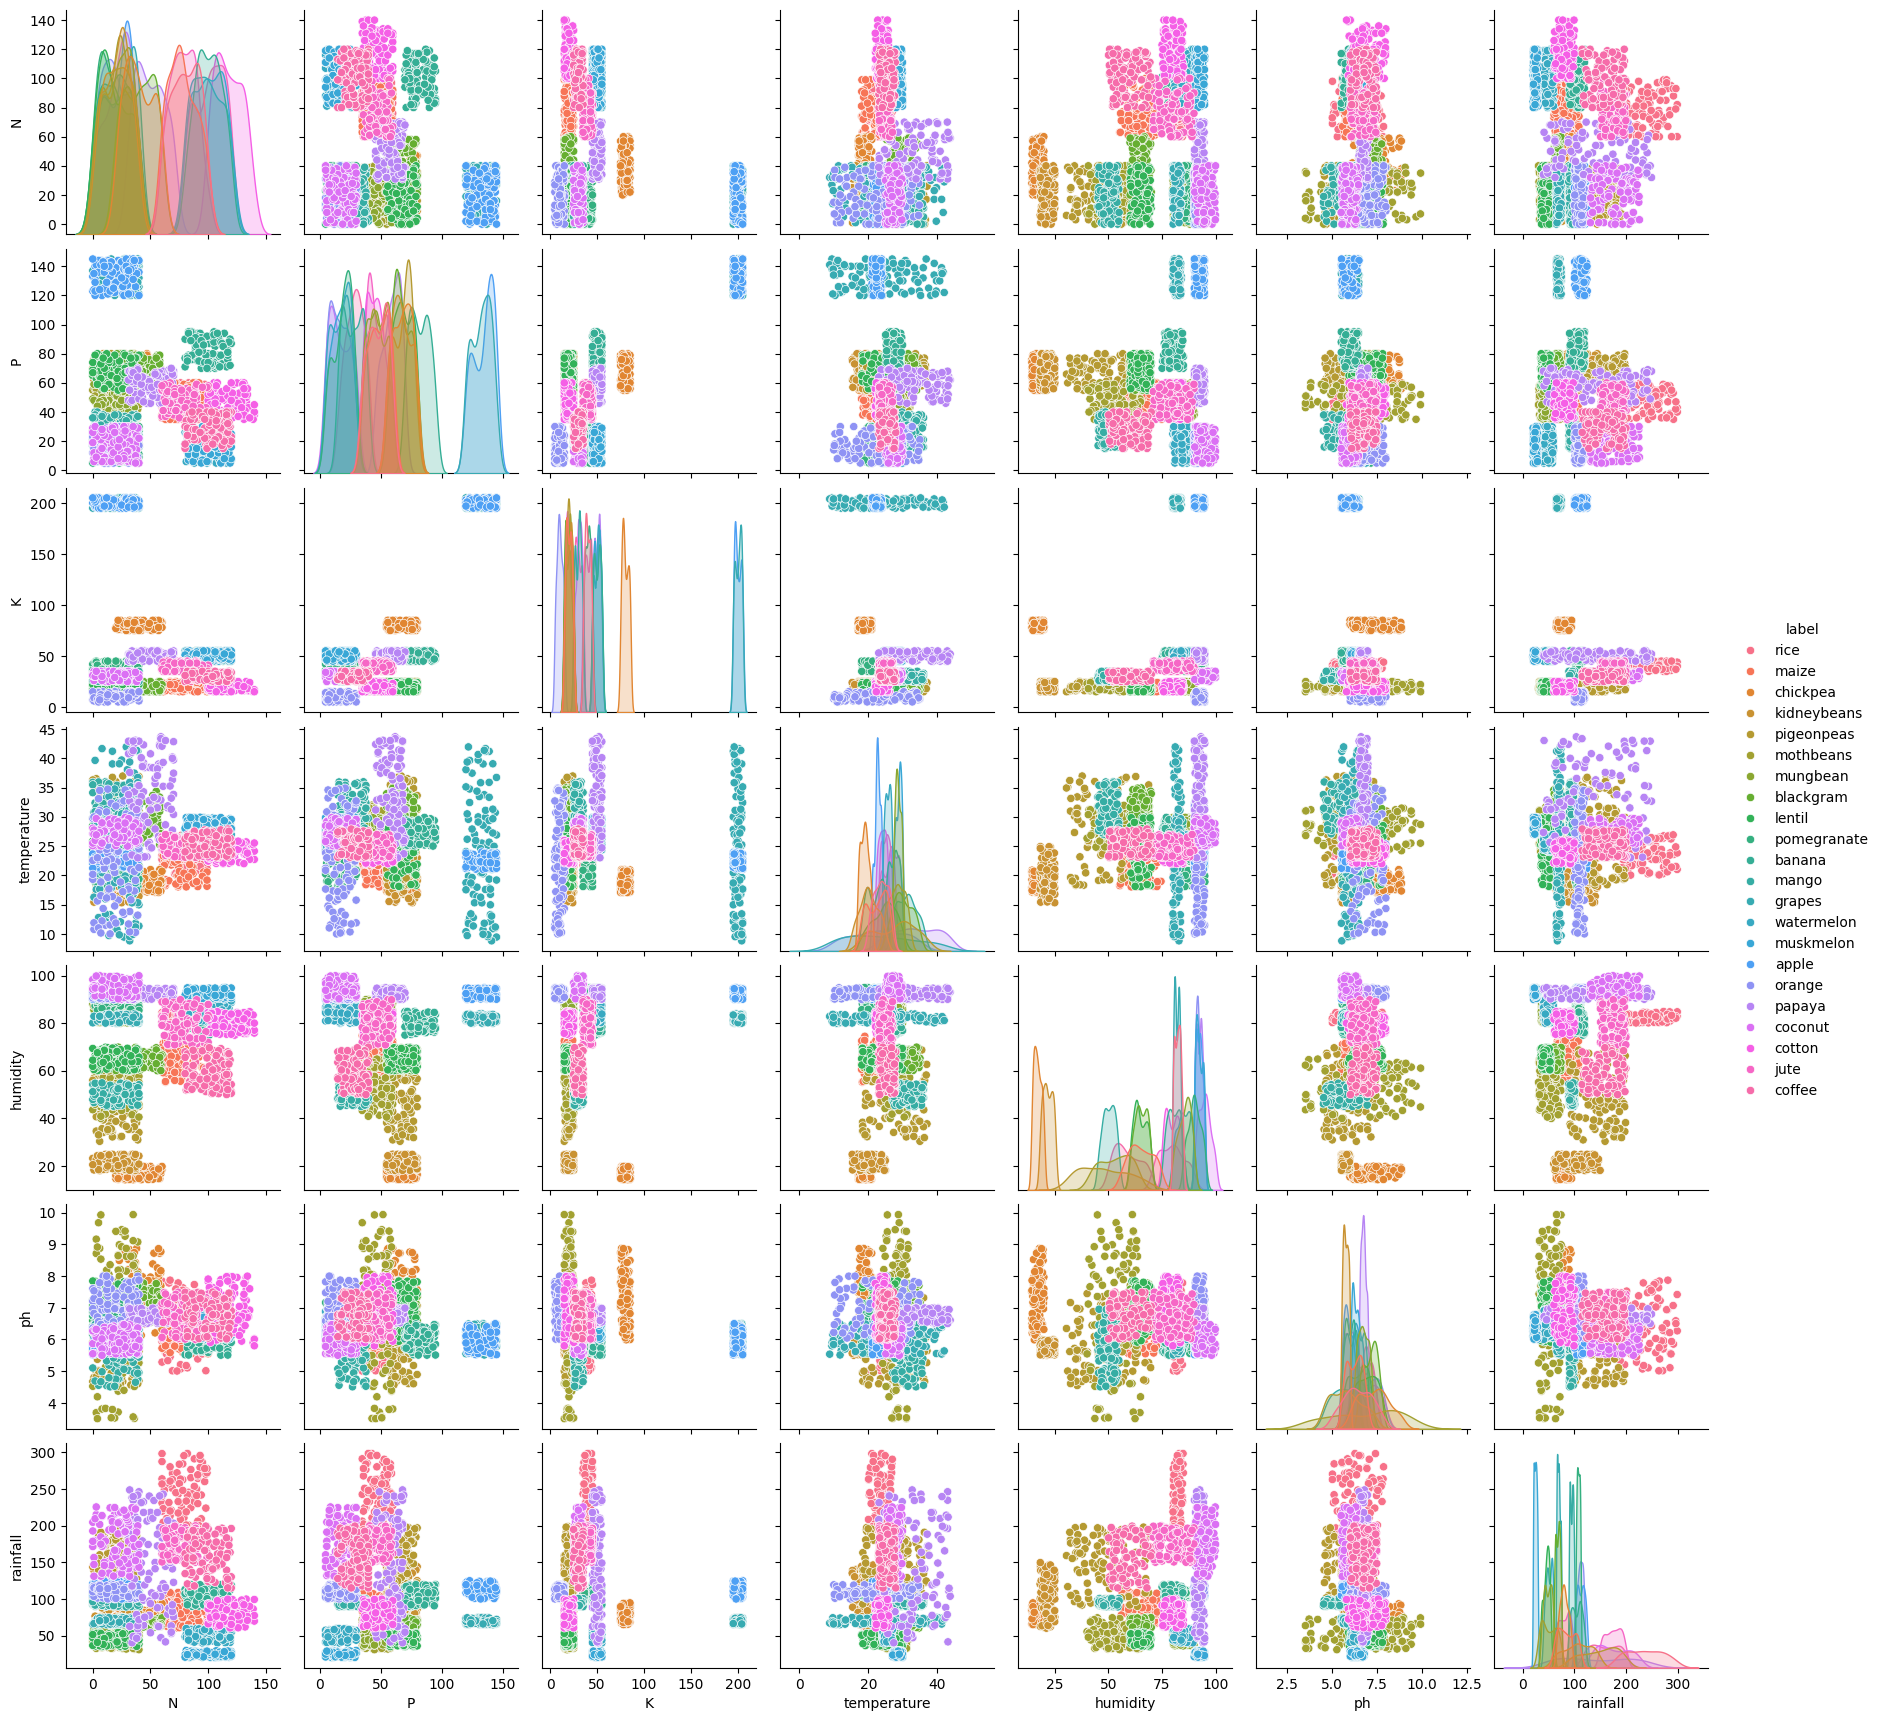

In [8]:
# Plot pairwise relationships
sns.pairplot(crop_reco_data, hue='label', vars=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])
plt.show()

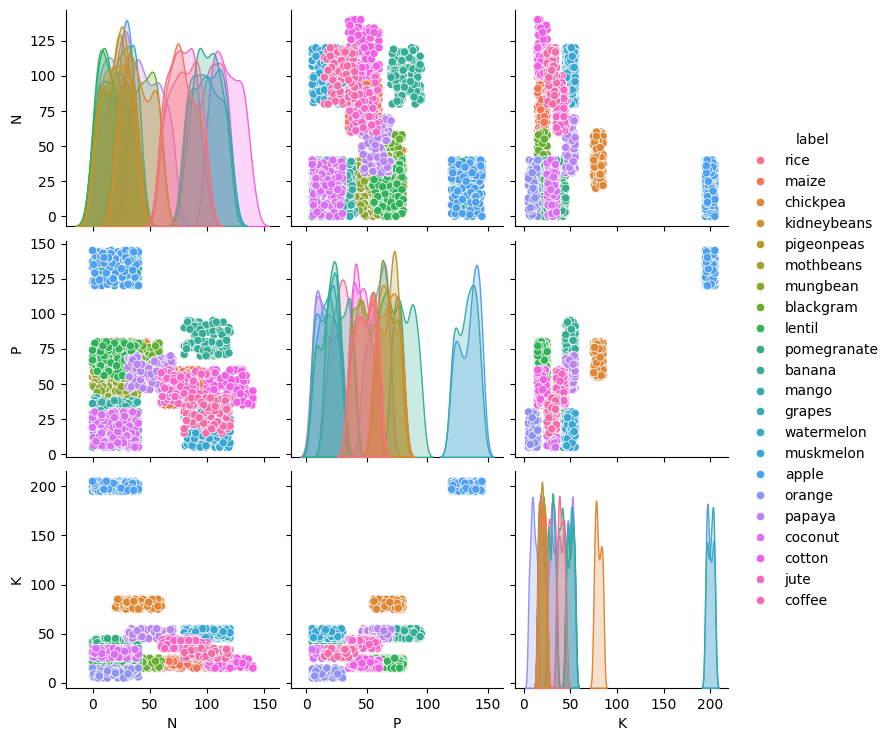

In [9]:
 # Plot pairwise relationships (macronutrients in fertilizer)
sns.pairplot(crop_reco_data, hue='label', vars=['N', 'P', 'K'])
plt.show()


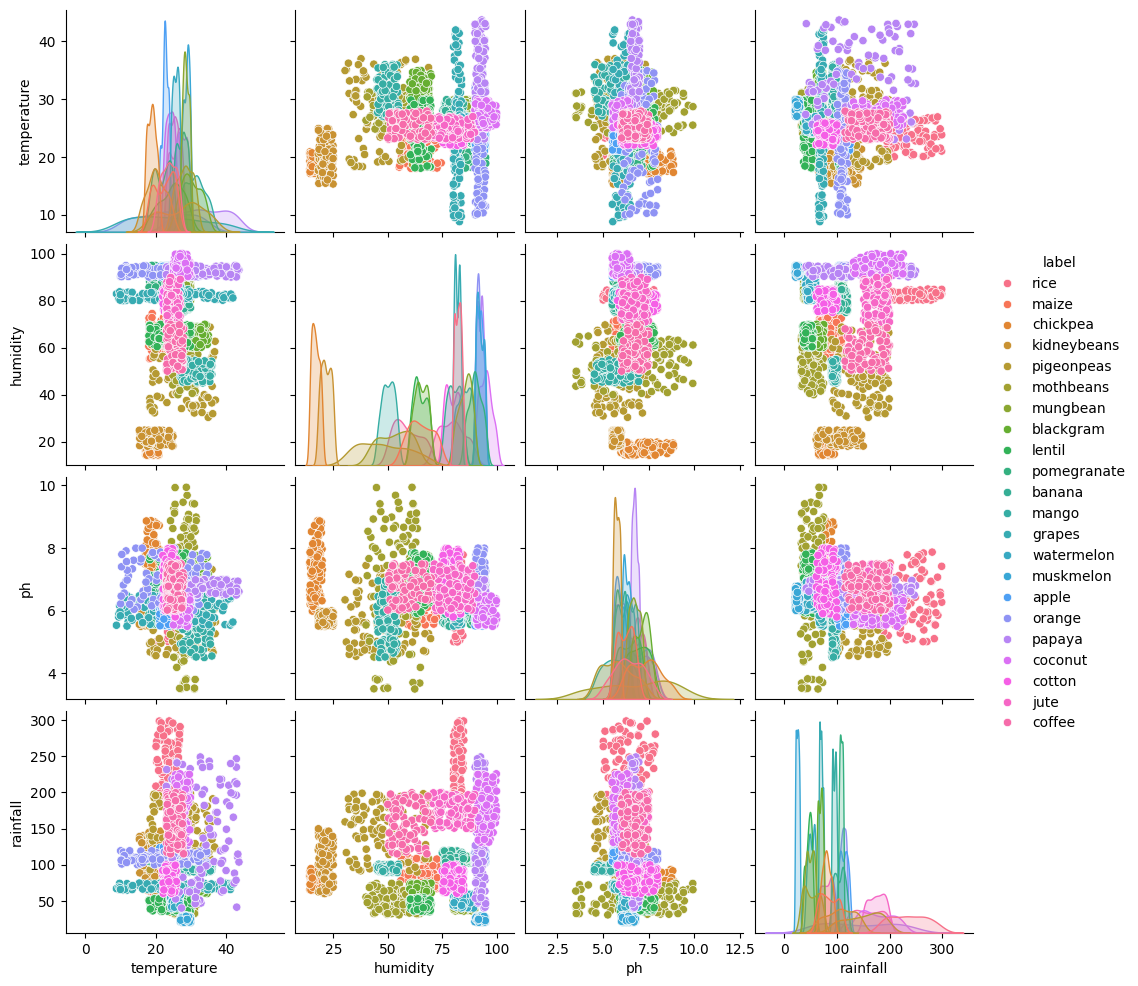

In [10]:

# Plot pairwise relationships (environmental factors)
sns.pairplot(crop_reco_data, hue='label', vars=['temperature','humidity','ph','rainfall'])
plt.show()

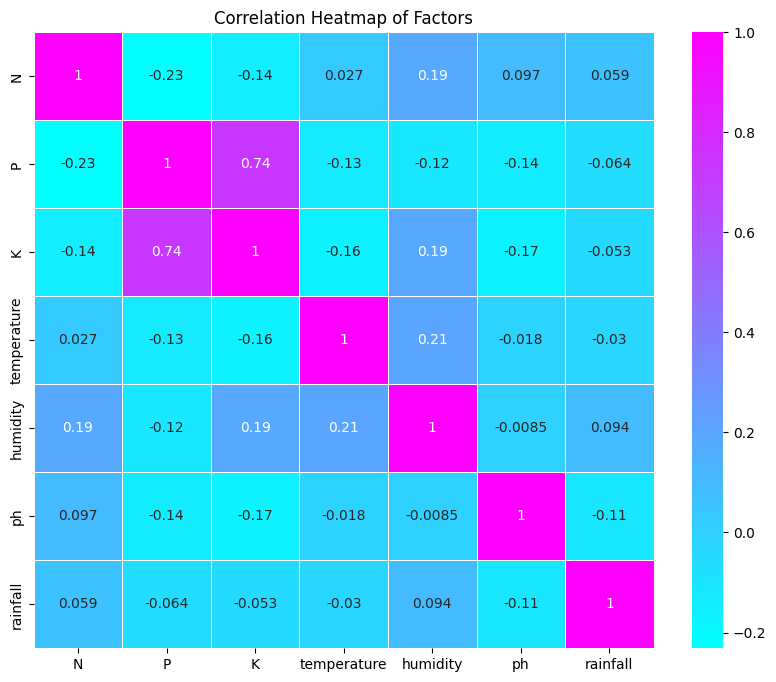

In [11]:
# Calculate correlation matrix
corr_matrix = crop_reco_data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='cool', linewidths=0.5)
plt.title('Correlation Heatmap of Factors')
plt.show()



<h3 style='color:red'>Data Training and Testing</h3>

In [12]:
# since our target variable (crop label) is categorical, we will use encoder to turn it into numerical values
label_encoder = LabelEncoder()
crop_reco_data['label'] = label_encoder.fit_transform(crop_reco_data['label'])

In [13]:
#splitting the data 
X = crop_reco_data[['N', 'P','K','temperature','humidity','ph','rainfall']]  #factors
y = crop_reco_data['label']  # Target 

In [14]:
# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
#training the model

system = RandomForestClassifier()

system.fit(X_train, y_train)
y_pred = system.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9931818181818182

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00    

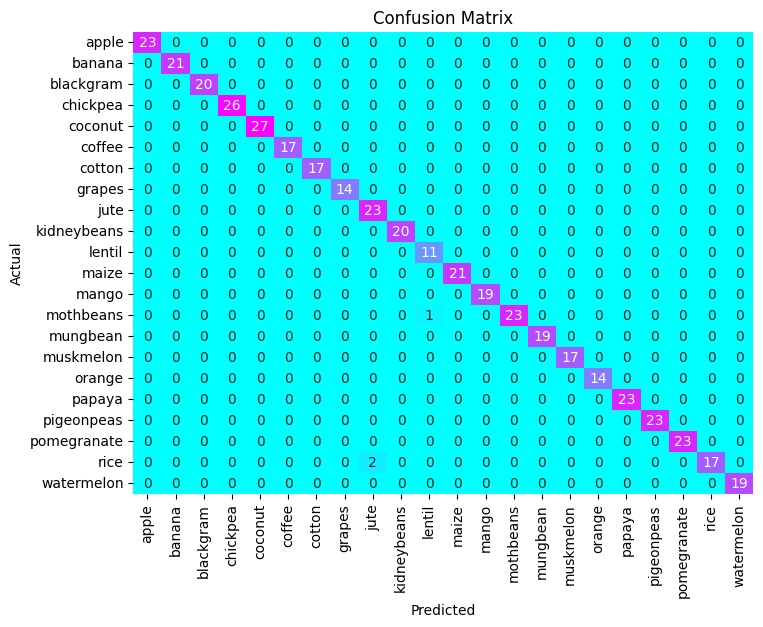

In [22]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6)) 
sns.heatmap(cm, annot=True, fmt='d', cmap='cool', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, cbar=False)


plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


C:\Users\Calea\AppData\Local\Temp\ipykernel_14712\3559392313.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=features, palette='cool')


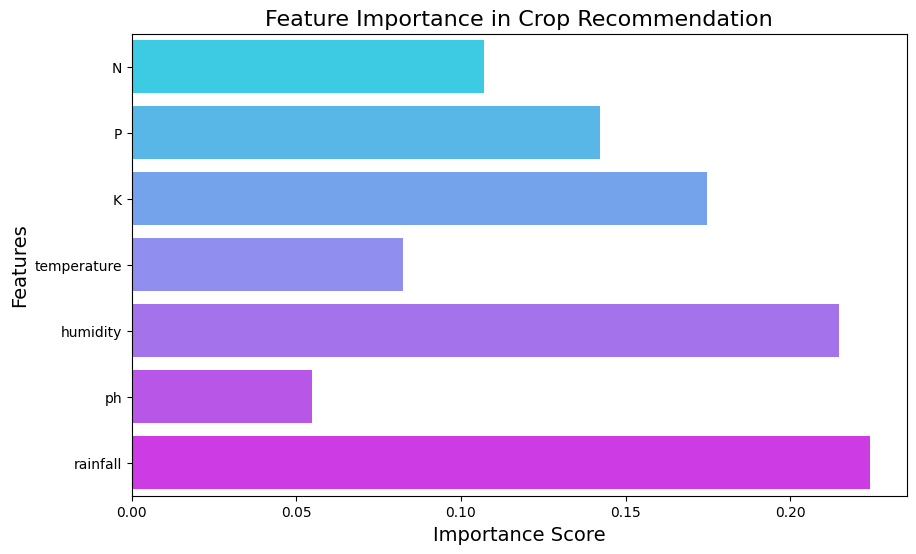

In [17]:
# Get feature importances to know which factors matter most for recommendations
feature_importance = system.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=features, palette='cool')
plt.title('Feature Importance in Crop Recommendation', fontsize=16)
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.show()

In [23]:
#we are going to use flask to show run it in a web browser, using this will save it in a pickel file that can be load using joblib
import pickle

with open('model.pkl', 'wb') as model_file:
    pickle.dump(system, model_file)

with open('label_encoder.pkl', 'wb') as encoder_file:
    pickle.dump(label_encoder, encoder_file)

print("Model and LabelEncoder saved as 'model.pkl' and 'label_encoder.pkl'")

Model and LabelEncoder saved as 'model.pkl' and 'label_encoder.pkl'
